In [1]:
import wisps
import pandas as pd
import numba
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_hdf(wisps.COMBINED_PHOTO_SPECTRO_FILE, key='all_phot_spec_data')

In [3]:
def f_test_comp(x):
    return stats.f.cdf(x, 2, 1, 0, scale=1)
    

In [4]:
df['f_test_cdf']=df.x.apply(f_test_comp)

(-4, 4)

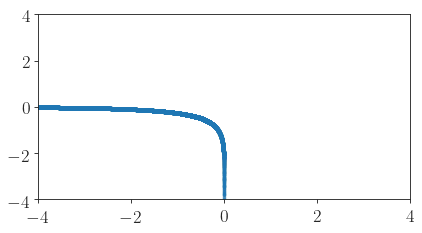

In [5]:
plt.scatter(df.f_test.apply(np.log10), df.f_test_cdf.apply(np.log10), alpha=0.1, s=5)
plt.xlim([-4, 4])
plt.ylim([-4, 4])

In [6]:
df.to_hdf(wisps.COMBINED_PHOTO_SPECTRO_FILE, key='all_phot_spec_data')

In [7]:
(df[df.class_star !=0.]).reset_index(drop=True).to_hdf(wisps.COMBINED_PHOTO_SPECTRO_FILE, key='stars')